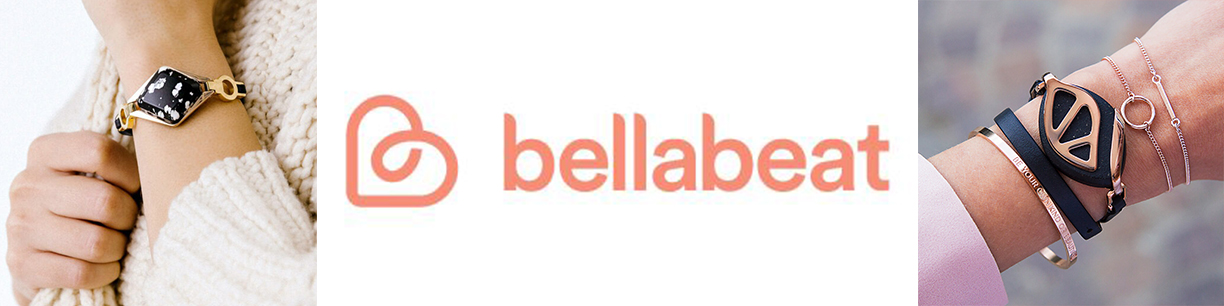

# 1- Preguntar

## Sobre la Compañia

Bellabeat es una empresa de alta tecnología que fabrica productos inteligentes focalizados en el cuidado de la salud, haciendo uso de  tecnología con un bonito diseño que informa e inspirará a las mujeres de todo el mundo. Recopila datos sobre la actividad física, el sueño, el estrés y la salud reproductiva le ha permitido a Bellabeat proporcionar a las mujeres conocimientos sobre su propia salud y sus hábitos.

## Tarea Empresarial
Analizar los datos y determinar la actividad física promedio de los usuarios en la semana, para posteriormente diseñar estrategias de marketing sobre cómo influye tener un dispositivo tecnológico que lleve los registros de nuestras actividades diarias ayuda a mejorar día a día.

## Interesados
* Urška Sršen: Cofundadora y directora creativa de Bellabeat
* Sando Mur: Matemático y cofundador de Bellabeat, miembro clave del equipo ejecutivo de Bellabeat.
* Equipo de análisis computacional de datos de marketing de Bellabeat

Este Proyecto se enfocara en los datos recopilados a través de la aplicación *Fitbit* y que tanto los usuarios realizan actividades físicas, la compañía *Bellabeat* cuenta con diversos productos tecnológicos que recopilan que pueden recopilar esos datos entre ellos:

* Leaf: Dispositivo de seguimiento clásico de bienestar de Bellabeat que se puede usar como pulsera, collar o clip. El dispositivo Leaf se conecta a la aplicación Bellabeat para hacer un seguimiento de la actividad física, el sueño y el estrés.

* Time: Este reloj de bienestar combina el aspecto intemporal de un reloj clásico con la tecnología inteligente para hacer el seguimiento de la actividad física, el sueño y el estrés del usuario. El reloj Time se conecta a la aplicación Bellabeat para proporcionar información sobre el bienestar diario.

* Spring: Es una botella de agua que hace el seguimiento diario del consumo de agua mediante el uso de tecnología inteligente para garantizar la hidratación adecuada a lo largo del día. La botella Spring se conecta a la aplicación Bellabeat para hacer el seguimiento de los niveles de hidratación.


Para este análisis algunas preguntas que se buscan contestar son:

* ¿ Cual es la promedio de actividad fisica de los usuarios a la semana ?

* ¿ Cuantas calorias gastan los usuarios a la semana ?

* ¿ Se puede incentivar a los usuarios a mejorar su actividad fisica ?

# 2- Preparar

### Descripción de la fuente
Los datos utilizados están almacenados en [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit), recolectados por un tercero con la siguiente descripción.

>This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.


### Descripción de conjunto de datos:
Cuenta con 18 archivos CSV, 15 están organizados en formato largo mientras 3 en formato amplio, a cada usuarios se le asigno un ID único para ser fácilmente identificado en las diversas tablas de las cuales podemos encontrar entre ellas las calorías diarias, la intensidad de las actividades, los pasos dados entre muchos otros que pueden ayudar en nuestro análisis.

> Para mas información sobre las tablas se puede consultar la documentación en el siguiente enlace [fitabase](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf)


### Credibilidad e integridad de los datos:

Nuestros datos cuenta con ciertas limitaciones entre ellas:

> * Son datos recopilados de solo 30 personas lo que puede generar un sesgo ya que no tenemos información demográfica.
> 
> * Los datos no se encuentran actualizados ya que los datos fueron recopilados en 2016.
> 
> * La limitación del tiempo (2 meses).

Paquetes Requeridos para el analisis:  **"tidyverse", "janitor", "lubridate",  "dplyr", "tidyr", "skimr", "ggplot2", "patchwork"**

In [1]:
#Cargamos Librerias
library(tidyverse)
library(lubridate)
library(janitor)
library(dplyr)
library(tidyr)
library(skimr)
library(ggplot2)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Cargar datos necesarios:

Para este análisis utilizaremos 4 conjuntos de datos:

* **dailyActivity_merged**
* **hourlyCaloroies_merged**
* **hourlySteps_merged**
* **sleeDay_merged**

Nos enfocaremos en medidas en semana y por hora ya que nos interesa saber a grandes rasgos cuales son las tendencias de las personas no podemos analizarlas de forma individual ya que no conocemos información sobre ellos como edad, condición, lugar demográfico, y podría generar datos muy altos o muy bajos en algunos participantes.

In [2]:
actividades <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calorias_hora <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
pasos_hora <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sueño_diario <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet t

## Comprobar que los datos se cargaran correctamente

In [3]:
head(actividades)
str(actividades)
head(calorias_hora)
str(calorias_hora)
head(pasos_hora)
str(pasos_hora)
head(sueño_diario)
str(sueño_diario)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


# 3- Limpieza de Datos

## Comprobamos que no existan nulos

In [4]:
sum(is.na(actividades))
sum(is.na(calorias_hora))
sum(is.na(pasos_hora))
sum(is.na(sueño_diario))

[1] 0

[1] 0

[1] 0

[1] 0

In [5]:
colSums(is.na(actividades))
colSums(is.na(calorias_hora))
colSums(is.na(pasos_hora))
colSums(is.na(sueño_diario))

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

Id ActivityHour     Calories 
           0            0            0

Id ActivityHour    StepTotal 
           0            0            0

Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed 
                 0

### Estandarizar nombre de columnas

In [6]:
actividades<-rename_with(actividades,tolower)
calorias_hora<-rename_with(calorias_hora,tolower)
pasos_hora<-rename_with(pasos_hora,tolower)
sueño_diario<-rename_with(sueño_diario,tolower)

# 4- Analizar

## Se procedera a crear una nueva tabla con promedios agrupados por día

In [7]:
#Creamos una tabla con el promedio de las columnas y los agrupamos por el día de la semana 

actividades_promedio = actividades %>%
    mutate(activitydate = as.Date(activitydate, format = "%m/%d/%Y"),
            dia_semana = weekdays(activitydate))  %>%
      group_by(dia_semana) %>%
      summarise(pasos_promedio = mean(totalsteps),distancia_promedio = mean(totaldistance),
                calorias_promedio = mean(calories), 
                activida_alta = mean(veryactivedistance),
                actividad_moderada = mean(moderatelyactivedistance),
                actividad_ligera = mean(lightactivedistance),
                sedentario = mean(sedentaryactivedistance),
                minutos_altos = mean(veryactiveminutes),
                minutos_medios = mean(fairlyactiveminutes),
                minutos_ligeros = mean(lightlyactiveminutes),
                minutos_sedentarios = mean(sedentaryminutes))

#Ordenamos de Lunes a Domingo

    actividades_promedio <- actividades_promedio %>%
      arrange(match(dia_semana, c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
                                  "Sunday")))

 head(actividades_promedio,7)

dia_semana,pasos_promedio,distancia_promedio,calorias_promedio,activida_alta,actividad_moderada,actividad_ligera,sedentario,minutos_altos,minutos_medios,minutos_ligeros,minutos_sedentarios
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,7780.867,5.552917,2324.208,1.537333,0.5858333,3.363083,0.002583333,23.10833,14.00000,192.0583,1027.9417
Tuesday,8125.007,5.832237,2356.013,1.613289,0.5930263,3.471053,0.001447368,22.95395,14.33553,197.3421,1007.3618
Wednesday,7559.373,5.488333,2302.620,1.633467,0.5270667,3.256333,0.001333333,20.78000,13.10000,189.8533,989.4800
Thursday,7405.837,5.312245,2199.571,1.390476,0.5051701,3.283129,0.002312925,19.40816,11.95918,185.4218,961.9932
Friday,7448.230,5.309921,2331.786,1.312937,0.4838095,3.489127,0.001825397,20.05556,12.11111,204.1984,1000.3095
Saturday,8152.976,5.854677,2354.968,1.514597,0.6773387,3.617177,0.001048387,21.91935,15.20161,207.1452,964.2823
Sunday,6933.231,5.027190,2263.000,1.488926,0.6180165,2.892314,0.000661157,19.98347,14.52893,173.9752,990.2562


## Realizamos lo mismo con la tabla sueño diario

In [8]:

#Se Mostrara una tabla con el promedio de las columnas y los agrupamos por el día de la semana

sueño_promedio = sueño_diario %>%
 mutate(sleepday = as.Date(sleepday, format = "%m/%d/%Y"),
       dia_semana = weekdays(sleepday))  %>%
  group_by(dia_semana) %>%
  summarise(sueño_promedio = mean(totalminutesasleep),
            tiempo_en_cama_promedio = mean(totaltimeinbed)) %>%
    mutate(sueño_promedio_hora = sueño_promedio / 60,
           tiempo_en_cama_hora = tiempo_en_cama_promedio / 60)
  
#Ordenamos de Lunes a Domingo

    sueño_promedio <- sueño_promedio %>%
      arrange(match(dia_semana, c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
                                  "Sunday")))

     head(sueño_promedio,7)

dia_semana,sueño_promedio,tiempo_en_cama_promedio,sueño_promedio_hora,tiempo_en_cama_hora
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,418.8298,456.1702,6.980496,7.602837
Tuesday,404.5385,443.2923,6.742308,7.388205
Wednesday,434.6818,470.0303,7.244697,7.833838
Thursday,402.3692,435.8000,6.706154,7.263333
Friday,405.4211,445.0526,6.757018,7.417544
Saturday,420.8103,461.2759,7.013506,7.687931
Sunday,452.7455,503.5091,7.545758,8.391818


## Unimos las tablas actividades_promedio y sueño_promedio

In [9]:
tabla_unida =  merge(x = actividades_promedio, y = sueño_promedio, by = c("dia_semana")) 

#Ordenamos de Lunes a Domingo
    tabla_unida <- tabla_unida %>%
      arrange(match(dia_semana, c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday",
                                  "Sunday"))) %>%
        select(-sueño_promedio,-tiempo_en_cama_promedio)

head(tabla_unida,7)

,dia_semana,pasos_promedio,distancia_promedio,calorias_promedio,activida_alta,actividad_moderada,actividad_ligera,sedentario,minutos_altos,minutos_medios,minutos_ligeros,minutos_sedentarios,sueño_promedio_hora,tiempo_en_cama_hora
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Monday,7780.867,5.552917,2324.208,1.537333,0.5858333,3.363083,0.002583333,23.10833,14.00000,192.0583,1027.9417,6.980496,7.602837
2,Tuesday,8125.007,5.832237,2356.013,1.613289,0.5930263,3.471053,0.001447368,22.95395,14.33553,197.3421,1007.3618,6.742308,7.388205
3,Wednesday,7559.373,5.488333,2302.620,1.633467,0.5270667,3.256333,0.001333333,20.78000,13.10000,189.8533,989.4800,7.244697,7.833838
4,Thursday,7405.837,5.312245,2199.571,1.390476,0.5051701,3.283129,0.002312925,19.40816,11.95918,185.4218,961.9932,6.706154,7.263333
5,Friday,7448.230,5.309921,2331.786,1.312937,0.4838095,3.489127,0.001825397,20.05556,12.11111,204.1984,1000.3095,6.757018,7.417544
6,Saturday,8152.976,5.854677,2354.968,1.514597,0.6773387,3.617177,0.001048387,21.91935,15.20161,207.1452,964.2823,7.013506,7.687931
7,Sunday,6933.231,5.027190,2263.000,1.488926,0.6180165,2.892314,0.000661157,19.98347,14.52893,173.9752,990.2562,7.545758,8.391818


In [10]:
#Mostramos el promedio de pasos, distancia y calorías semanales y el tiempo(días) en 4 categorías
tabla_promedios = tabla_unida %>%
    summarise(pasos_semanales_promedio = mean(pasos_promedio),
              distancia_semanal_promedio = mean(distancia_promedio),
              calorias_semanales_promedio = mean(calorias_promedio),
              tiempo_activo_alto_semanal = mean(minutos_altos),
              tiempo_activo_medio_semanal = mean(minutos_medios),
              tiempo_activo_bajo_semanal = mean(minutos_ligeros),
              tiempo_sedenario_promedio_semanal = mean(minutos_sedentarios),  
              total_tiempo_sueño_hora =  mean(sueño_promedio_hora),
              total_tiempo_en_cama_hora = mean(tiempo_en_cama_hora)) 
    

head(tabla_promedios)

,pasos_semanales_promedio,distancia_semanal_promedio,calorias_semanales_promedio,tiempo_activo_alto_semanal,tiempo_activo_medio_semanal,tiempo_activo_bajo_semanal,tiempo_sedenario_promedio_semanal,total_tiempo_sueño_hora,total_tiempo_en_cama_hora
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7629.36,5.482503,2304.595,21.17269,13.60519,192.8563,991.6607,6.998562,7.655072


In [11]:
#Convertimos la columna activityhour de ambas tablas  a formato 24 horas 
calorias_hora$activityhour=as.POSIXct(calorias_hora$activityhour, format="%m/%d/%Y %I:%M:%S %p", 
                                      tz=Sys.timezone())

pasos_hora$activityhour=as.POSIXct(pasos_hora$activityhour, format="%m/%d/%Y %I:%M:%S %p", 
                                   tz=Sys.timezone())

## Datos relevantes:

Los pasos promedio semanales son 7629 con una distancia equivalente a 5.48 KM, con un gasto calórico de 2304 calorías al día.

Se puede apreciar que como semanalmente pasan 4.8 días de forma sedentaria, mientras en actividad solo pasan 2.2 de días.

Las horas de sueño en promedio están llegando a 7 por día  aproximadamente y el tiempo que pasan en cama 7.6.

## Unimos las tablas calorias_hora y pasos_hora

In [12]:
# Unimos la tablas calorias_hora y pasos, sacamos un promedio  hora los ordenamos por  hora 
        tabla_unida_hora = inner_join(x = calorias_hora, y = pasos_hora, 
                                      by = c("id","activityhour" = "activityhour" )) %>%
            group_by(id) 

            tabla_unida_hora = separate(tabla_unida_hora, activityhour,into=c("fecha", "hora"),sep = " ") %>%
            group_by(hora)  %>%
            select(-fecha) %>%
            summarise(calorias = mean(calories),pasos_totales = mean(steptotal)) %>%
            group_by(hora)

head(tabla_unida_hora)

hora,calorias,pasos_totales
<chr>,<dbl>,<dbl>
00:00:00,71.80514,42.188437
01:00:00,70.16506,23.102894
02:00:00,69.18650,17.110397
03:00:00,67.53805,6.426581
04:00:00,68.26180,12.699571
05:00:00,81.70815,43.869099


# 5-Compartir

In [13]:
#Ordenar días 
tabla_unida$dia_semana <- ordered(tabla_unida$dia_semana, 
                    levels=c("Monday", "Tuesday", "Wednesday", 
                             "Thursday","Friday", "Saturday", "Sunday"))

Warning message in geom_col(aes(x = dia_semana, y = distancia_promedio, fill = dia_semana), :
“Ignoring unknown parameters: `stat`”


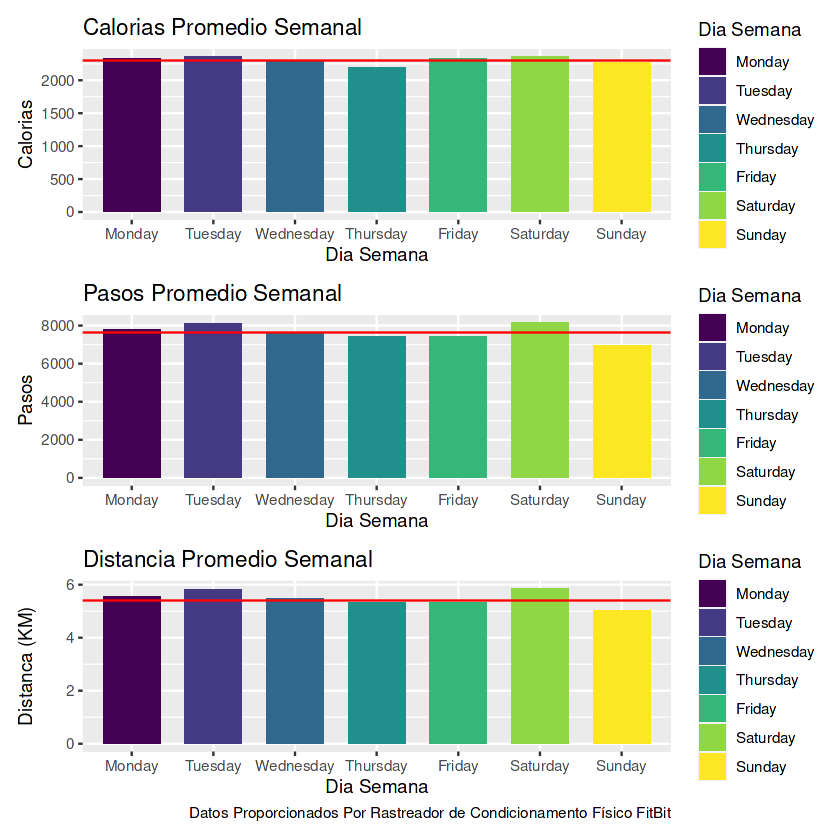

In [14]:
# Visualización

t1 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = calorias_promedio, fill=dia_semana),
           stat = 'identity',
           width = 0.7)  + geom_hline(yintercept=2304, color="red") +
    labs(title = "Calorias Promedio Semanal", x="Dia Semana", y="Calorias", fill="Dia Semana" )

 t2 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = pasos_promedio, fill=dia_semana),
           stat = 'identity',
           width = 0.7) +  geom_hline(yintercept=7629, color="red") +
    labs(title = "Pasos Promedio Semanal", x="Dia Semana", y="Pasos", fill="Dia Semana")

 t3 = ggplot(data = tabla_unida) + 
  geom_col(aes(x = dia_semana, y = distancia_promedio, fill= dia_semana),
           stat = 'identity',
           width = 0.7) + geom_hline(yintercept=5.4, color="red") +
    labs(title = "Distancia Promedio Semanal", x="Dia Semana", y="Distanca (KM)", fill="Dia Semana" ,
         caption="Datos Proporcionados Por Rastreador de Condicionamento Físico FitBit")

t1 / t2 / t3

* #### Se puede observar que el gasto calórico más bajos son los días jueves y domingos, mientras los más altos sábados y martes

* #### Se pasa por inicio de semana fuerte, pero baja a media semana, el gasto calórico, pasos y distancia sube mucho los días sábados

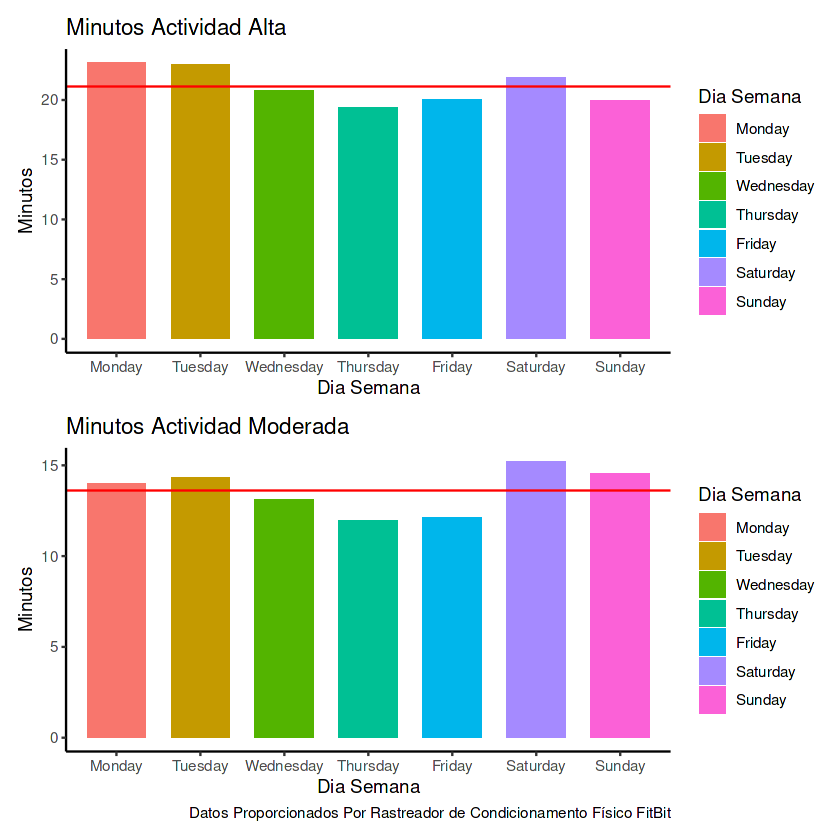

In [15]:
# Visualización
t4 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = minutos_altos, fill=dia_semana),
           stat = 'identity',
           width = 0.7)  +   theme_classic() + scale_fill_hue() + geom_hline(yintercept=21.1, color="red") +
    labs(title = "Minutos Actividad Alta", x="Dia Semana", y="Minutos", fill="Dia Semana")

t5 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = minutos_medios, fill=dia_semana),
           stat = 'identity',
           width = 0.7) +   theme_classic() + scale_fill_hue() + geom_hline(yintercept=13.6, color="red") +
    labs(title = "Minutos Actividad Moderada", x="Dia Semana", y="Minutos", fill="Dia Semana",
         caption="Datos Proporcionados Por Rastreador de Condicionamento Físico FitBit")
  
t4 / t5

* #### En minutos de actividad alta y moderada se observa que en promedio no se llega a la hora diaria es algo alarmante porque nos indica que las personas no suelen ejercitar de forma regular.

* #### De nuevo se repite la tendencia donde a mitad de semana martes-viernes suele bajar los minutos de actividad.

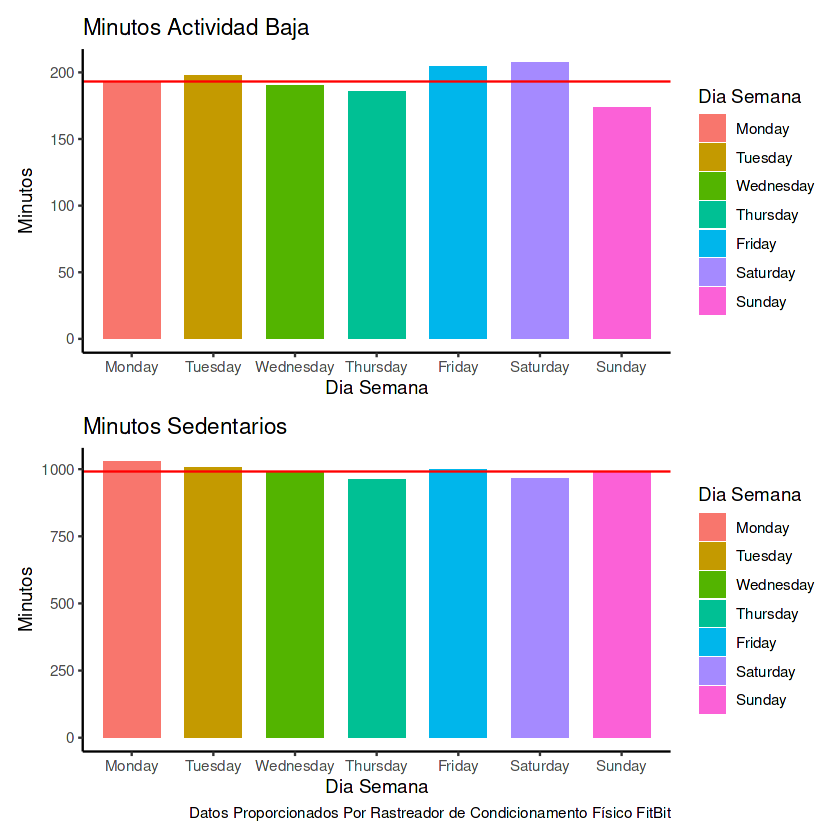

In [16]:
 #Visualizacion

t6 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = minutos_ligeros, fill=dia_semana),
           stat = 'identity',
           width = 0.7)  +   theme_classic() + scale_fill_hue()+ geom_hline(yintercept=192.8, color="red") +
    labs(title = "Minutos Actividad Baja", x="Dia Semana", y="Minutos", fill="Dia Semana" )

t7 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = minutos_sedentarios, fill=dia_semana),
           stat = 'identity',
           width = 0.7) +   theme_classic() + scale_fill_hue()+geom_hline(yintercept=991.6, color="red") +
    labs(title = "Minutos Sedentarios", x="Dia Semana", y="Minutos", fill="Dia Semana",
        caption="Datos Proporcionados Por Rastreador de Condicionamento Físico FitBit")
  
t6 / t7

* #### En contraste los minutos en actividades ligeras y sedentarios son exponencialmente muy altos nos indica poco o nulo ejercicio en la semana.

* #### Es algo grave que viene acompañado de un gasto calórico bajo.

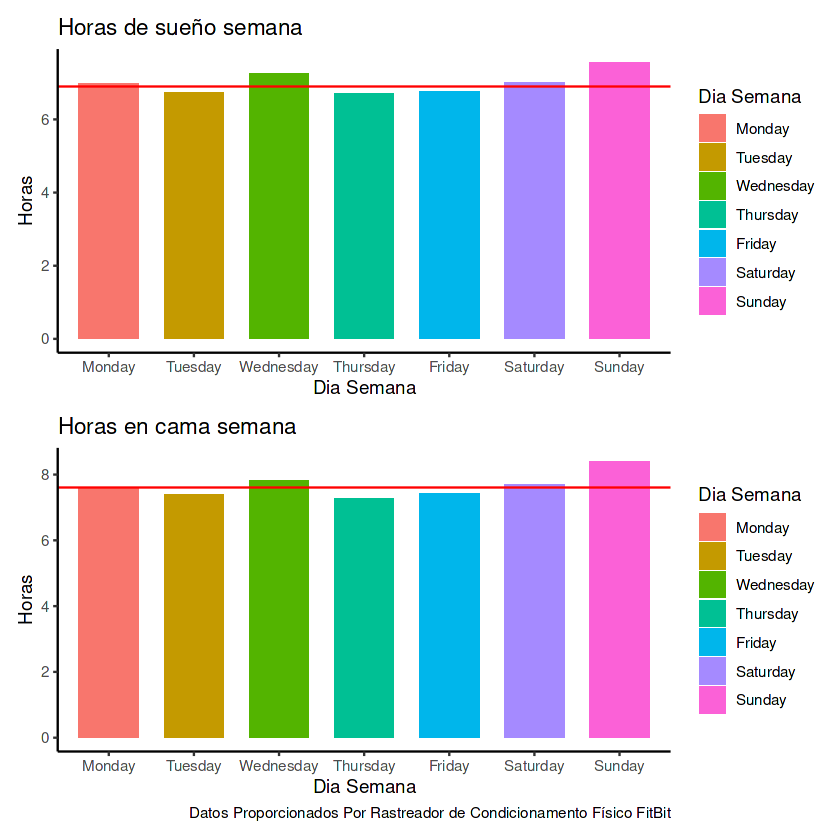

In [17]:
 #Visualizacion

t8 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = sueño_promedio_hora, fill=dia_semana),
           stat = 'identity',
           width = 0.7)  +   theme_classic() + scale_fill_hue()+geom_hline(yintercept=6.9, color="red") +
    labs(title = "Horas de sueño semana", x="Dia Semana", y="Horas", fill="Dia Semana" )

t9 = ggplot(data = tabla_unida) + 
  geom_bar(aes(x = dia_semana, y = tiempo_en_cama_hora, fill=dia_semana),
           stat = 'identity',
           width = 0.7) +   theme_classic() + scale_fill_hue()+geom_hline(yintercept=7.6, color="red") +
    labs(title = "Horas en cama semana", x="Dia Semana", y="Horas", fill="Dia Semana",
         caption="Datos Proporcionados Por Rastreador de Condicionamento Físico FitBit")
  



t8 / t9

* #### Las horas de sueño y en cama nos pueden indicar que, aunque en días se duerma más o se duerma menos esto no se ve reflejado en la actividad diaria.

* #### El miércoles que es uno de los días que más se duerme no se ve reflejada en el gasto calórico y actividades ya que se mantienen en el promedio.

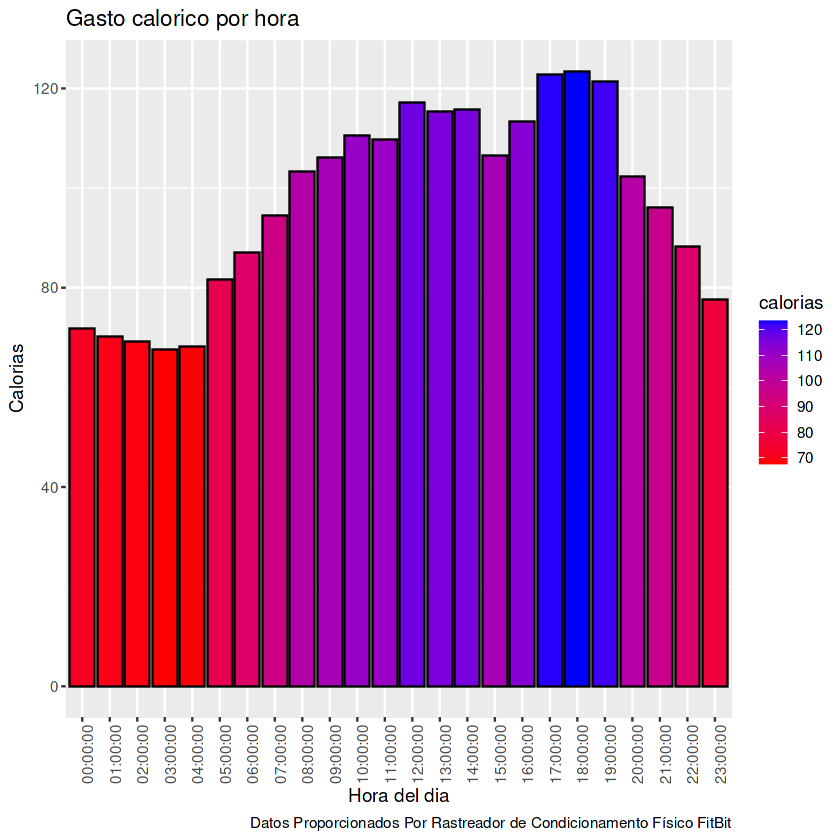

In [18]:
 #Visualizacion
  
ggplot(data=tabla_unida_hora)+(aes(x=hora, y=calorias, fill=calorias)) +
  geom_col(color="black") +
  scale_fill_gradient(low="red", high="blue") +
  theme(axis.text.x=element_text(angle=90)) +
  labs(title="Gasto calorico por hora", x="Hora del dia", y="Calorias", caption="Datos Proporcionados Por Rastreador de Condicionamento Físico FitBit")

* #### Se puede observar que en el día los mayores gastos calóricos en promedio suelen ser de 5pm a las 7pm se puede interpretar como las horas más libres de los participantes al día.

* #### Podemos deducir que son las horas más óptimas para realizar alguna actividad física.

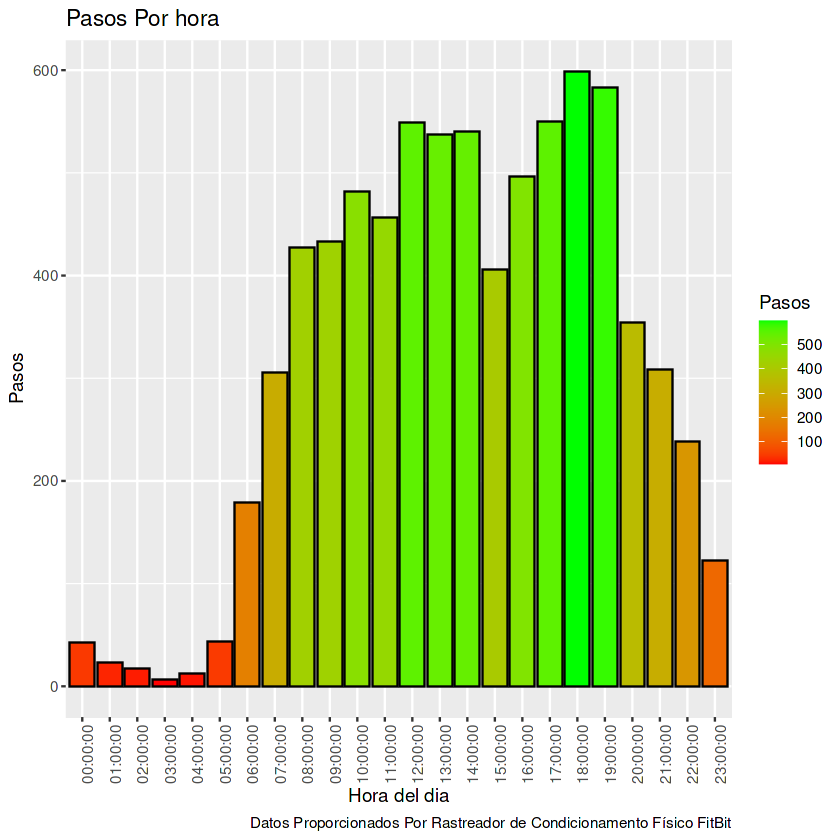

In [19]:
#Visualizacion

  ggplot(data=tabla_unida_hora)+(aes(x=hora, y=pasos_totales, fill=pasos_totales)) +
  geom_col(color="black") +
  scale_fill_gradient(low="red", high="green") +
  theme(axis.text.x=element_text(angle=90)) +
  labs(title="Pasos Por hora", x="Hora del dia", y="Pasos", caption="Datos Proporcionados Por Rastreador de Condicionamento Físico FitBit",
       fill="Pasos")

* #### De la misma forma y siendo congruente con el gasto calórico la mayor cantidad de pasos se suele dar dentro de esas horas

# 6- Conlusiones

* Como se observa a lo largo del análisis y graficas las actividades de las personas nos arrojaron que sus pasos a lo largo de la semana son muy pocos ya que en promedio no llegan a los 8000 mil pasos diarios y el gasto calórico alcanza  los 2304  *La OMS, Organización Mundial de la Salud, establecen un aporte calórico para el adulto sano de 2000 a 2500 kcal/día para el hombre y de 1500 a 2000 kcal/día para la mujer.* Lo que quiere decir que si bien es un gasto calórico normal en actividades regulares nos indica que las personas realizan una nula o baja actividad física ya que teniendo en cuenta las gráficas sobre tiempo en actividad un gran porcentaje de estas son bajas o sedentarias. 

* También podemos ver que se realiza menos de una hora diaria en actividades moderas o altas y por lo regular estas solo al inicio de semana tienden a ser mayores, decayendo con el pasar de los días solo subiendo un poco los días sábados pero aun así no llegan a tener un impacto alto en el gasto calórico ya que estas son en intervalos muy cortos de tiempo.


* El tiempo de sueño y en cama suele ser arriba de 6 horas llegando casi a 8 en promedio estos nos indica que suelen tener un sueño reparador *la Oficina de Prevención de Enfermedades y Promoción de la Salud (ODPHP, por sus siglas en inglés), nos dice que una persona adulta necesita 7 horas de sueño de buena calidad * solo 3 días son los que suelen llegar a esta marca pero el tiempo en cama sube hasta las casi 8 horas en promedio, lo cual podemos deducir que las personas deben contar con la energía necesaria para realizar sus actividades diarias y también podrían hacer un poco de ejercicio si tomamos en cuenta solo los datos que analizamos. 

* Otro dato valioso es saber cuáles son las horas más activas de las personas y estas suelen ser entre las 5pm y 7pm, ya que suelen estar más en movimiento esto reflejado en la gráfica de pasos realizados y por ende siendo el mayor gasto calórico del día, esto es porque suelen ser las horas donde más actividades suelen realizar siendo también por diversos factores como el clima, el tiempo libre suele ser mayor a esas horas, podemos deducir que son  perfectas para tener una actividad física de alto impacto ya que los factores indican que son las horas más activas en general.

## Recomendaciones

* Despues de analizar toda la informacion extraida una recomendacion es crear un sistema dentro de la app que incentive a generar mas actividad a lo largo de la semana ya sea mediante un ranking donde a decision de cada persona pueda registrarse y competir, donde las personas dependiendo de la categoria ya sea por quema de calorias o pasos, los mas altos puedan ganar algun descuento en la compra de un producto de Bellabeat.

* Tambien crear noticificaciones dentro de time,leaf y spring y futuros productos donde permita establecer objeticos personales y mostrar avisos donde informe a los clientes si el objetivo establecido se esta cumpliendo, mostrar recomendaciones de ir aumentando progresivamente la carga de actividad  fisica a lo largo de las semanas.

* Dar un enfoque de marketing dentro de nuestros productos donde se explique que estan diseñados no solo en monitorear la salud, si no tambien en contribuir un estilo de vida mas saludable mediante actividad fisica y como esto contruibuye a una mejor calidad de vida, ya que tenemos diversos productos enfocados en ello, tambien en un futuro realizar un analisis con los datos recolectados de nuestros productos y dar una vista de como nuestros clientes estan realiazando mas ejercicio de forma regular.

## Referencias

1.Conjunto de Datos  Rastreados  de Condicionamento Físico FitBit: https://www.kaggle.com/datasets/arashnic/fitbit

2.viviendo sanamente duerme-lo-suficiente https://health.gov/espanol/myhealthfinder/viviendo-sanamente/salud-mental-relaciones-otras-personas/duerme-lo-suficiente#:~:text=La%20mayor%C3%ADa%20de%20los%20adultos,horario%20similar%20todas%20las%20noches


3.Comunidad madrid sanidad  https://.comunidad.madrid/sites/default/files/doc/sanidad/alim/ficha_13.pdf